In [ ]:
# PROBABILITY DISTRIBUTION

In [ ]:
# TYPES OF VARIABLES

# QUANTITATIVE
# 1. Discrete variable : jumlah, misal jumlah murid, jumlah voting (integer)
# 2. Continuous variable : angka measurement, misal temperature, berat badan (biasanya float)

# QUALITATIVE
# 1. Nominal : men, women (setara)
# 2. Ordinal : sd, smp, sma (berlevel)

In [39]:
import numpy as np
import pandas as pd
import statistics as st
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import math

In [40]:
df = pd.read_csv('Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


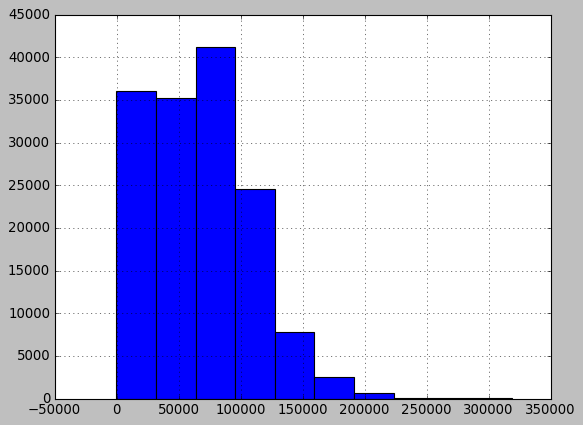

In [41]:
# menampilkan histogram dari suatu kolom
df['BasePay'].hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000145AF5BE988>,
      dtype=object)

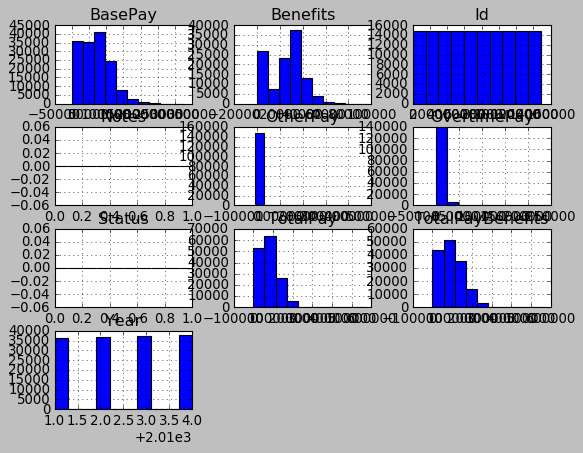

In [42]:
# menampilkan histogram dari semua kolom berisi angka dlm dataframe
df.hist()

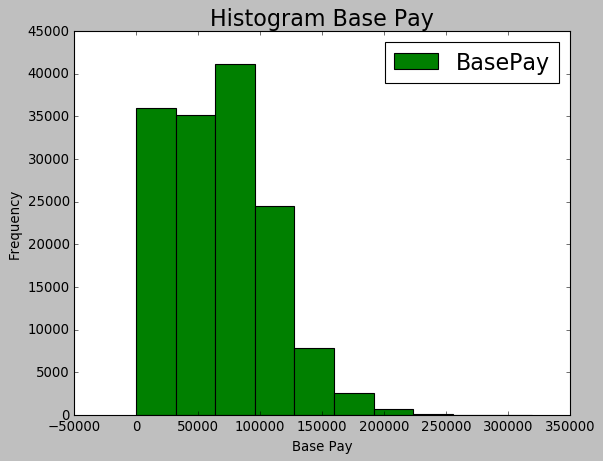

In [43]:
# menampilkan histogram dgn matplotlib
# parameternya banyak, bisa diisi sesuai selera

plt.style.use('classic') # menentukan style 
plt.hist(df['BasePay'], color='green') # keluar dgn background
plt.xlabel('Base Pay', size=12) # nama sumbu x
plt.ylabel('Frequency', size=12) # nama sumbu y
plt.title('Histogram Base Pay', size=20) # judul utama histogram
plt.legend(['BasePay'], loc=0, fontsize=20) # menampilkan legend, parameter bisa diisi dgn location dll

plt.show() # agar ga ada backgroundnya

# style dan color untuk matplotlib bisa dicari

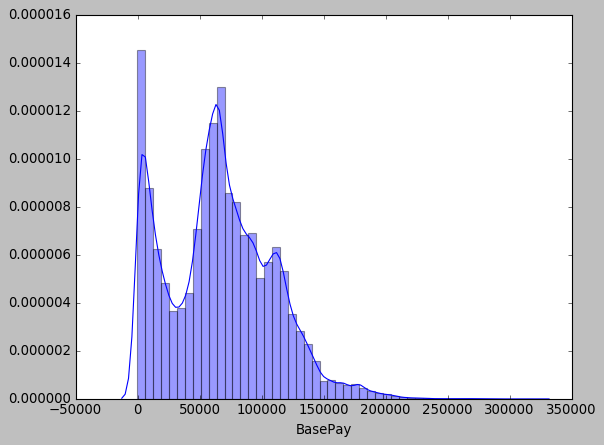

In [44]:
# Menggunakan seaborn
import seaborn as sns 

sns.distplot(df['BasePay'], kde=True)
# kde (Gaussian kernel density estimate) untuk memunculkan distribution

plt.show()

# CALCULATE SKEWNESS & KURTOSIS

In [45]:
stats.skew(df['BasePay'].dropna())
# kalau normal distribution memiliki skewness=0

0.4233452911441905

In [46]:
stats.skewtest(df['BasePay'].dropna())
# skewtest untuk ngecek apakah datanya sesuai dgn distribusi normal
# pvalue<0.05 --> reject H null (H null adalah Hipotesis 0/ atau hipotesis yg sesuai keadaan umum), berarti skewnessnya diasumsikan tidak normal

SkewtestResult(statistic=63.83480483919286, pvalue=0.0)

In [47]:
stats.kurtosis(df['BasePay'].dropna(), fisher=False)
# fisher=True --> menggunakan pengujian Fisher, nilai outputnya adalah nilai excess kurtosis (dikurang 3)
# fisher=False --> menggunakan pengujian Pearson
# Normal distribution punya nilai kurtosis=3

3.115880268315066

In [48]:
stats.kurtosistest(df['BasePay'].dropna())
# kurtosistest juga untuk ngecek apakah datanya sesuai dgn distribusi normal
# pvalue<0.05 --> reject H null (H null adalah Hipotesis 0/ atau hipotesis yg sesuai keadaan umum), berarti kurtosisnyanya diasumsikan tidak normal

KurtosistestResult(statistic=8.617397473389556, pvalue=6.8493046095917805e-18)

# Jenis Bentuk Kurtosis

- Mesokurtic : excess kurtosis=0, normal distribution
- Leptokurtic : excess kurtosis>0, banyak outliers, high risk investment
- Platykurtic : excess kurtosis<0, sedikit outliers

# Normaltest : combine kurtosis & skewess

## 1. D'Agostino and Pearson's

- Fungsi ini ngetest Null Hypothesis dimana samplenya berasal dari normal distribution.
- Mengkombinasikan skewness dan kurtosis 

In [49]:
print(stats.normaltest(df['BasePay'].dropna()))
print('normaltest teststat = %6.3f pvalue = %6.4f' % stats.normaltest(df['BasePay'].dropna()))

# pvalue<0.05, distribusi diasumsikan tidak normal, reject H Null

NormaltestResult(statistic=4149.141848072221, pvalue=0.0)
normaltest teststat = 4149.142 pvalue = 0.0000


## 2. Shapiro-Wilk test
- secara power lebih kuat dibanding D'Agostino and Pearson's
- tapi valid hanya untuk dataset kecil

In [50]:
k2, p = stats.shapiro(df['BasePay'].dropna())
alpha = 0.001 # atau 0.05
print(f'p = {p}')

if p < alpha: # null hypothesis: x comes from a normal distribution 
    print('The Null Hypothesis CAN be rejected')
    print('This distribution in NOT NORMAL')
else:
    print('The Null Hypothesis can NOT be rejected')
    print('This distribution in NORMAL')


p = 0.0
The Null Hypothesis CAN be rejected
This distribution in NOT NORMAL


# TUGAS KELOMPOK

In [51]:
random=np.random.randn(100)
random

array([ 0.29511528, -0.12394793, -1.31238206, -0.65825095,  0.23329098,
       -1.11969247,  0.51114733,  0.22939942, -0.31896129,  0.1695518 ,
        0.80529426,  0.31264717,  0.86644298,  0.95590779,  0.83020587,
       -0.958169  ,  0.37444394, -0.97979795, -0.39040549, -0.43926957,
        0.98366461,  1.10009505, -0.80186571,  1.43635029,  1.09564342,
       -0.2392044 ,  0.23126213,  1.06678482, -0.10843041,  0.07241292,
        0.65900816, -0.73992018,  0.59663551,  0.19810248,  1.37622719,
       -0.76188239,  0.09551404, -0.66163917, -0.69943884,  0.10212795,
       -0.96803755,  0.26648843,  0.6037894 ,  0.02788553, -1.64584638,
       -0.68366188, -0.64028731, -0.77741068,  0.33760923,  0.05629194,
       -2.68688788,  0.61358304,  0.67904038, -2.47525026,  0.95526366,
       -0.59375688,  0.31607556, -1.80875435, -1.15876102, -0.61137349,
       -0.66961953,  0.45227095, -0.92425396, -1.1449001 ,  2.82237045,
       -2.22071968,  0.81121406,  0.51141313, -0.35051043, -1.64

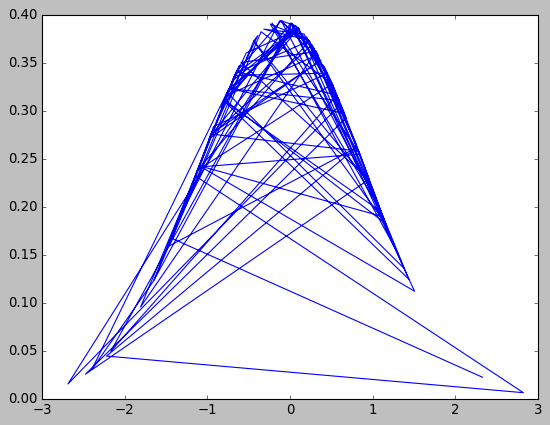

In [52]:
mean = st.mean(random)
stdev = st.stdev(random)
x = random

plt.plot(x, stats.norm.pdf(x, mean, stdev))
plt.show()

In [53]:
stats.norm.pdf(random, mean, stdev)

array([0.3645688 , 0.39361777, 0.19296245, 0.33868621, 0.37270261,
       0.23782016, 0.32779271, 0.37317415, 0.3848067 , 0.3797953 ,
       0.26362316, 0.36204936, 0.24929848, 0.22822865, 0.25780391,
       0.27557656, 0.35246438, 0.27059082, 0.37810686, 0.37252385,
       0.22170932, 0.19473263, 0.31021416, 0.12431391, 0.19574852,
       0.39012866, 0.37294906, 0.2023692 , 0.39370066, 0.38790184,
       0.29690165, 0.3229838 , 0.31036555, 0.37678602, 0.13579467,
       0.31853358, 0.38628003, 0.3380635 , 0.33094252, 0.38578003,
       0.27330589, 0.36848323, 0.30885021, 0.39047411, 0.12338776,
       0.33395278, 0.34194306, 0.3153347 , 0.35830703, 0.38891788,
       0.0152187 , 0.30676292, 0.29246741, 0.02536724, 0.22838015,
       0.35001362, 0.36154606, 0.09534488, 0.22861926, 0.34702197,
       0.33658645, 0.33895486, 0.28331998, 0.23188157, 0.00611275,
       0.04426366, 0.26224289, 0.32774065, 0.3820677 , 0.12310118,
       0.03029295, 0.32222611, 0.38515008, 0.36002446, 0.30295

In [54]:
print(f'mean = {mean}')
print(f'stdev = {stdev}')

mean = -0.10225690866027835
stdev = 1.0132949226769052


(array([ 5.,  3.,  8., 21., 15., 25., 16.,  5.,  0.,  2.]),
 array([-2.68688788, -2.13596205, -1.58503621, -1.03411038, -0.48318455,
         0.06774128,  0.61866712,  1.16959295,  1.72051878,  2.27144461,
         2.82237045]),
 <a list of 10 Patch objects>)

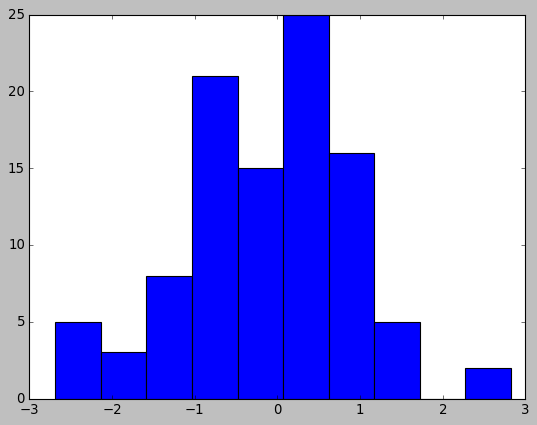

In [55]:
plt.hist(random)

## Excersice

Dari Salaries.csv:
* Buat histogram untuk semua kolom yang berisi angka
* cek skewness dan kurtosis dari kolom TotalPayBenefit
* apakah kolom TotalPayBenefit memiliki distribusi normal?


In [56]:
sal = pd.read_csv('Salaries.csv')
sal.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


## 1. Buat histogram untuk semua kolom yang berisi angka

In [24]:
# plt.hist(sal[['Id','BasePay','OvertimePay','OtherPay','Benefits','TotalPay','TotalPayBenefits','Notes','Year','Status']])

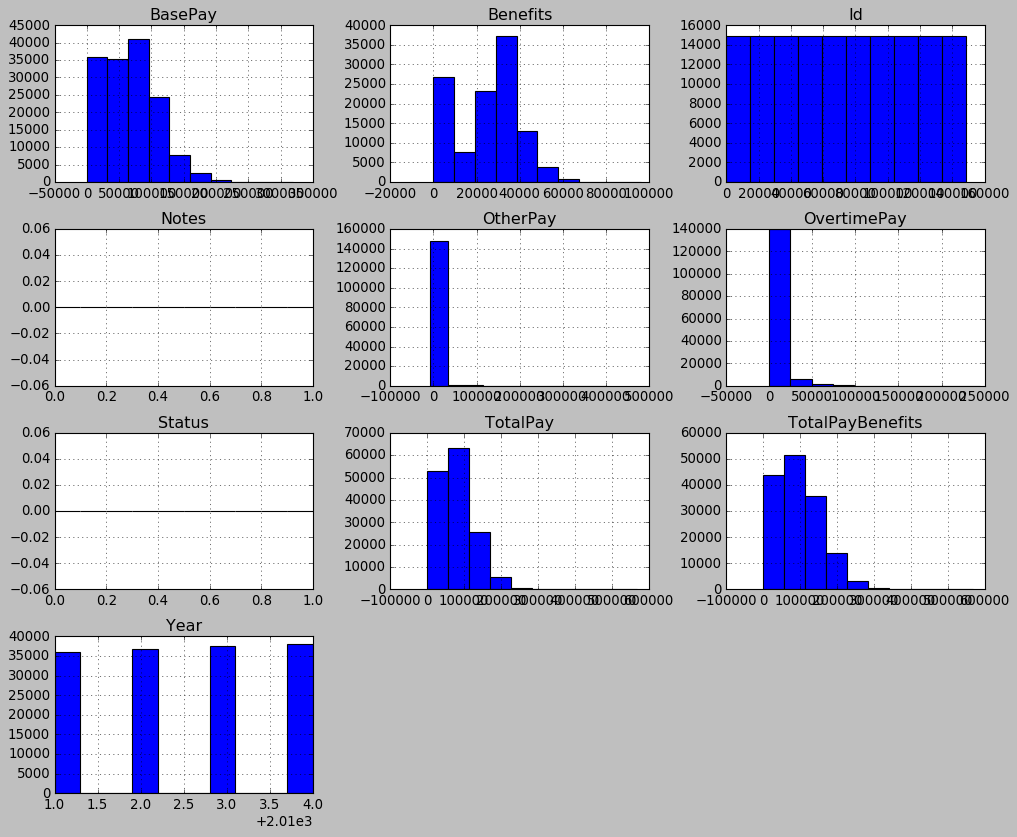

In [62]:
sal.hist(figsize=(15,12))
plt.show()

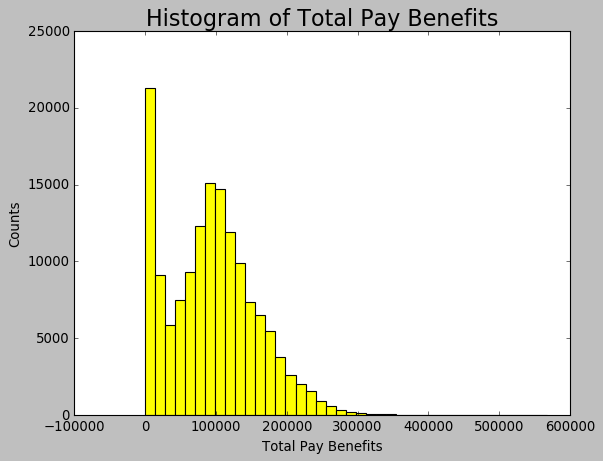

In [63]:
# membuat histogram dgn matplotlib.pyplot
plt.style.use('classic')
plt.hist(sal['TotalPayBenefits'], bins=40, color='yellow')
plt.xlabel('Total Pay Benefits')
plt.ylabel('Counts')
plt.title('Histogram of Total Pay Benefits', size=20)
plt.show()

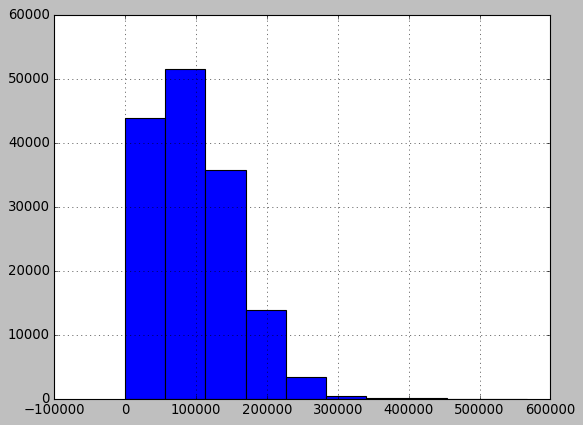

In [29]:
# membuat histogram dgn 
sal['TotalPayBenefits'].hist()
plt.show()

## 2. Cek skewness dan kurtosis dari kolom TotalPayBenefit

## H-0 diasumsikan DISTRIBUSI NORMAL
## H-1 diasumsikan DISTRIBUSI TIDAK NORMAL

In [25]:
stats.skew(sal['TotalPayBenefits'].dropna())

0.44869620237998015

In [26]:
stats.skewtest(sal['TotalPayBenefits'].dropna())
# pvalue<0.05 berarti distribution TIDAK NORMAL

SkewtestResult(statistic=67.48601413833568, pvalue=0.0)

In [64]:
stats.kurtosis(sal['TotalPayBenefits'].dropna(), fisher=False)

2.992528541576839

In [27]:
stats.kurtosis(sal['TotalPayBenefits'].dropna()) # ini nilai excess kurtosis

-0.007471458423160993

In [28]:
stats.kurtosistest(sal['TotalPayBenefits'].dropna())
# pvalue>0 berarti platykurtic
# pvalue>0.05 berarti distribusi NORMAL

# pvalue menunjukkan persentase kemungkinan munculnya H-0 apabila, 
# dgn kata lain, tingkat kesalahan minimal kita adalah 5% (pvalue harus > 0.05) 
# atau dari 100 kali percobaan, kesalahan kita hanya 5 kali

KurtosistestResult(statistic=-0.580733656990459, pvalue=0.5614199742439383)

## 3. Normal Test pada column 'TotalPayBenefits'

In [30]:
print(stats.normaltest(sal['TotalPayBenefits'].dropna()))
print('normaltest teststat = %6.3f pvalue = %6.4f' % stats.normaltest(sal['TotalPayBenefits'].dropna()))

# pvalue<0.05 berarti distribusi TIDAK NORMAL


NormaltestResult(statistic=4554.699355860004, pvalue=0.0)
normaltest teststat = 4554.699 pvalue = 0.0000


In [31]:
k2, p = stats.shapiro(df['TotalPayBenefits'].dropna())
alpha = 0.001 # atau 0.05 (tergantung domain knowledge
print(f'p = {p}')

if p < alpha: # null hypothesis: x comes from a normal distribution 
    print('The Null Hypothesis CAN be rejected')
    print('This distribution in NOT NORMAL')
else:
    print('The Null Hypothesis can NOT be rejected')
    print('This distribution in NORMAL')


p = 0.0
The Null Hypothesis CAN be rejected
This distribution in NOT NORMAL
